# NN PMC avec Keras


#### Yulia Kalugina

### Chargememnt des librairies

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

- L’objectif de ces exercices est de pratiquer le perceptron simple et le perceptron
multicouche en utilisant la bibliothèque Keras.

- Soit l’ensemble des données Segmentation (disponible aussi sur Lea) qui
comprend 2310 observations d’images décrites par 19 variables (caractéristiques)
et leurs variable cibles (classe).

### 1. Téléchargez le contenu de la base de données.

In [2]:
df = pd.read_excel('segmentation.xlsx')
df

,region_centroid_col,region_centroid_row,region_pixel_count,short_line_density_5,short_line_density_2,vedge_mean,vegde_sd,hedge_mean,hedge_sd,intensity_mean,rawred_mean,rawblue_mean,rawgreen_mean,exred_mean,exblue_mean,exgreen_mean,value_mean,saturation_mean,hue_mean,classe
0,218,178,9,0.11,0.0,0.83,0.55,1.11,0.54,59.63,52.44,75.22,51.22,-21.56,46.78,-25.22,75.22,0.32,-2.04,path
1,113,130,9,0.00,0.0,0.28,0.25,0.33,0.37,0.89,0.00,2.56,0.11,-2.67,5.00,-2.33,2.56,1.00,-2.12,foliage
2,202,41,9,0.00,0.0,0.94,0.77,1.11,1.03,123.04,111.89,139.78,117.44,-33.44,50.22,-16.78,139.78,0.20,-2.30,sky
3,32,173,9,0.00,0.0,1.72,1.78,9.00,6.75,43.59,39.56,52.89,38.33,-12.11,27.89,-15.78,52.89,0.27,-2.00,path
4,61,197,9,0.00,0.0,1.44,1.52,2.61,1.93,49.59,44.22,61.56,43.00,-16.11,35.89,-19.78,61.56,0.30,-2.02,path
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,30,102,9,0.00,0.0,1.22,0.12,1.33,0.80,20.26,20.33,25.00,15.44,0.22,14.22,-14.44,25.00,0.38,-1.56,brickface
2306,143,24,9,0.00,0.0,1.28,0.91,0.89,1.14,127.63,117.67,141.67,123.56,-29.89,42.11,-12.22,141.67,0.17,-2.35,sky
2307,80,72,9,0.00,0.0,1.22,1.00,1.44,1.17,59.00,51.33,74.44,51.22,-23.00,46.33,-23.33,74.44,0.31,-2.09,cement
2308,98,133,9,0.00,0.0,0.56,0.17,0.39,0.33,0.96,0.00,2.78,0.11,-2.89,5.44,-2.56,2.78,1.00,-2.12,foliage


### 2. Procédez à une standardisation des données.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   region_centroid_col   2310 non-null   int64  
 1   region_centroid_row   2310 non-null   int64  
 2   region_pixel_count    2310 non-null   int64  
 3   short_line_density_5  2310 non-null   float64
 4   short_line_density_2  2310 non-null   float64
 5   vedge_mean            2310 non-null   float64
 6   vegde_sd              2310 non-null   float64
 7   hedge_mean            2310 non-null   float64
 8   hedge_sd              2310 non-null   float64
 9   intensity_mean        2310 non-null   float64
 10  rawred_mean           2310 non-null   float64
 11  rawblue_mean          2310 non-null   float64
 12  rawgreen_mean         2310 non-null   float64
 13  exred_mean            2310 non-null   float64
 14  exblue_mean           2310 non-null   float64
 15  exgreen_mean         

In [4]:
df1=df.copy()
df1.drop(columns=['classe'],inplace=True)

In [5]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
  
# transform data
df_std = scaler.fit_transform(df1)

In [6]:
df_std

array([[ 1.2761887 ,  0.94973634,  0.        , ...,  0.70102145,
        -0.46877222, -0.43831817],
       [-0.16333606,  0.11453842,  0.        , ..., -0.99219481,
         2.51046151, -0.49010061],
       [ 1.05683255, -1.43405774,  0.        , ...,  2.20548115,
        -0.99451935, -0.6066111 ],
       ...,
       [-0.61575812, -0.89465908,  0.        , ...,  0.68284489,
        -0.51258448, -0.4706822 ],
       [-0.36898245,  0.16673829,  0.        , ..., -0.98706809,
         2.51046151, -0.49010061],
       [-1.45205346,  0.41033768,  0.        , ..., -0.88872825,
         1.23990594, -0.0758411 ]])

### 3. Déterminez les différentes classes.

In [299]:
print('Les classes:\n')
dd=(list(df['classe'].value_counts().index))
class_names=[]
for i in (dd):
    print(i)
    class_names.append(i)

Les classes:

path
cement
foliage
sky
window
grass
brickface


In [8]:
df2=pd.DataFrame(df_std, columns = df1.columns)
df2

,region_centroid_col,region_centroid_row,region_pixel_count,short_line_density_5,short_line_density_2,vedge_mean,vegde_sd,hedge_mean,hedge_sd,intensity_mean,rawred_mean,rawblue_mean,rawgreen_mean,exred_mean,exblue_mean,exgreen_mean,value_mean,saturation_mean,hue_mean
0,1.276189,0.949736,0.0,2.410668,-0.194552,-0.394306,-0.115068,-0.364251,-0.131018,0.591553,0.560068,0.713087,0.469629,-0.765840,1.296593,-1.428854,0.701021,-0.468772,-0.438318
1,-0.163336,0.114538,0.0,-0.357047,-0.194552,-0.598129,-0.121759,-0.580366,-0.133910,-0.947427,-0.936970,-0.956566,-0.936155,0.865280,-0.838569,0.553118,-0.992195,2.510462,-0.490101
2,1.056833,-1.434058,0.0,-0.357047,-0.194552,-0.353541,-0.110161,-0.364251,-0.122685,2.252887,2.257225,2.196611,2.291015,-1.791659,1.472394,-0.698062,2.205481,-0.994519,-0.606611
3,-1.273827,0.862737,0.0,-0.357047,-0.194552,-0.064484,-0.087635,1.821843,-0.025404,0.171307,0.192374,0.199966,0.115089,0.050152,0.331222,-0.611475,0.180659,-0.687834,-0.412427
4,-0.876244,1.280336,0.0,-0.357047,-0.194552,-0.168248,-0.093434,0.051357,-0.107378,0.328506,0.325406,0.399194,0.243538,-0.295242,0.740061,-0.957822,0.382699,-0.556397,-0.425373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,-1.301246,-0.372660,0.0,-0.357047,-0.194552,-0.249777,-0.124658,-0.303295,-0.126597,-0.439936,-0.356597,-0.440918,-0.514502,1.114827,-0.367382,-0.495449,-0.469269,-0.205899,-0.127624
2306,0.247957,-1.729857,0.0,-0.357047,-0.194552,-0.227542,-0.107039,-0.425206,-0.120814,2.373144,2.422230,2.240041,2.459346,-1.485122,1.057933,-0.303226,2.249524,-1.125956,-0.638975
2307,-0.615758,-0.894659,0.0,-0.357047,-0.194552,-0.249777,-0.105031,-0.272817,-0.120304,0.575047,0.528380,0.695164,0.469629,-0.890182,1.273596,-1.265205,0.682845,-0.512584,-0.470682
2308,-0.368982,0.166738,0.0,-0.357047,-0.194552,-0.494364,-0.123543,-0.563742,-0.134590,-0.945593,-0.936970,-0.951511,-0.936155,0.846283,-0.816083,0.533203,-0.987068,2.510462,-0.490101


In [12]:
from sklearn.preprocessing import OneHotEncoder
#encodage de classes
enc =OneHotEncoder()
res= enc.fit_transform(df[["classe"]])
labels=pd.DataFrame(res.toarray(), columns=enc.categories_)
labels

,brickface,cement,foliage,grass,path,sky,window
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
2305,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2306,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2308,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
enc.categories_

[array(['brickface', 'cement', 'foliage', 'grass', 'path', 'sky', 'window'],
       dtype=object)]

In [ ]:
#merging the dataframes of variables and targets

In [13]:
df_tot=pd.concat([df2,labels],axis=1)

### 4. Considérez une partition de 70% pour l’entrainement.

In [15]:
from sklearn.linear_model import Perceptron
#Utilisation de stratification
train, test = train_test_split(df_tot, test_size=0.3,  stratify=df_tot[enc.categories_])

### 5. Vérifiez la taille de l’échantillon d’entrainement et de test par classe.

In [77]:
#!pip install prettytable
from prettytable import PrettyTable 

In [80]:
# Specify the Column Names while initializing the Table 
train_classe = PrettyTable(['  classe    ',train[columns].value_counts().index[0],train[columns].value_counts().index[1]]) 
test_classe = PrettyTable(['  classe    ',train[columns].value_counts().index[0],train[columns].value_counts().index[1]]) 
    
# Add rows 
for columns in labels.columns:
    train_classe.add_row([str(columns)[2:-3],train[columns].value_counts()[0],train[columns].value_counts()[1]])
    test_classe.add_row([str(columns)[2:-3],test[columns].value_counts()[0],test[columns].value_counts()[1]])

print('TRAIN \n',train_classe)
print('TEST \n',test_classe)

TRAIN 
 +--------------+------+-----+
|   classe     | 0.0  | 1.0 |
+--------------+------+-----+
|  brickface   | 1386 | 231 |
|    cement    | 1386 | 231 |
|   foliage    | 1386 | 231 |
|    grass     | 1386 | 231 |
|     path     | 1386 | 231 |
|     sky      | 1386 | 231 |
|    window    | 1386 | 231 |
+--------------+------+-----+
TEST 
 +--------------+-----+-----+
|   classe     | 0.0 | 1.0 |
+--------------+-----+-----+
|  brickface   | 594 |  99 |
|    cement    | 594 |  99 |
|   foliage    | 594 |  99 |
|    grass     | 594 |  99 |
|     path     | 594 |  99 |
|     sky      | 594 |  99 |
|    window    | 594 |  99 |
+--------------+-----+-----+


#### On voit que les donnees sont bien stratifiees

In [84]:
train.columns

Index([ 'region_centroid_col',  'region_centroid_row',   'region_pixel_count',
       'short_line_density_5', 'short_line_density_2',           'vedge_mean',
                   'vegde_sd',           'hedge_mean',             'hedge_sd',
             'intensity_mean',          'rawred_mean',         'rawblue_mean',
              'rawgreen_mean',           'exred_mean',          'exblue_mean',
               'exgreen_mean',           'value_mean',      'saturation_mean',
                   'hue_mean',         ('brickface',),            ('cement',),
                 ('foliage',),             ('grass',),              ('path',),
                     ('sky',),            ('window',)],
      dtype='object')

In [85]:
X_train=train[['region_centroid_col', 'region_centroid_row', 'region_pixel_count',
       'short_line_density_5', 'short_line_density_2', 'vedge_mean',
       'vegde_sd', 'hedge_mean', 'hedge_sd', 'intensity_mean', 'rawred_mean',
       'rawblue_mean', 'rawgreen_mean', 'exred_mean', 'exblue_mean',
       'exgreen_mean', 'value_mean', 'saturation_mean', 'hue_mean']]
y_train=train[enc.categories_]
X_test=test[['region_centroid_col', 'region_centroid_row', 'region_pixel_count',
       'short_line_density_5', 'short_line_density_2', 'vedge_mean',
       'vegde_sd', 'hedge_mean', 'hedge_sd', 'intensity_mean', 'rawred_mean',
       'rawblue_mean', 'rawgreen_mean', 'exred_mean', 'exblue_mean',
       'exgreen_mean', 'value_mean', 'saturation_mean', 'hue_mean']]
y_test=test[enc.categories_] 

### 6. Développez un perceptron simple et une architecture séquentielle (activation=’softmax’, optimizer=’adam’).

In [314]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
PMC = Sequential( )
# Ajout de la premiere couche "entree 􀀀> cachee"
# 30 neurones dans la premiere couche cachee
# ZTrain . shape[1] : dimension du vecteur de caracteristiques en entree
#PMC.add(layers.Dense( units=30,input_dim=X_train.shape[1] , activation='relu' ) )
# Ajout de la seconde couche "cachee 􀀀> cachee"
# 30 neurones dans la deuxieme couche cachee
#PMC.add(layers.Dense(30, activation='relu' ) )
# Ajout de la troisieme couche "cachee 􀀀> sor t ie "
# mYTrain. shape[1] neurones dans la couche cachee =
# nb de modalites de la variable cible
PMC.add(layers.Dense( units=y_train.shape[1] , activation='softmax' ) )
PMC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print('Number of layers :',len(PMC.layers)) 
print('Training')
#results = PMC.fit(X_train, y_train,validation_split=0.3,epochs=30)
# fit model
results = PMC.fit(X_train, y_train,validation_data=(X_test, y_test),epochs=30)

Number of layers : 1
Training
Epoch 1/30
51/51 [==============================] - 0s 3ms/step - loss: 1.7353 - accuracy: 0.2907 - val_loss: 1.5794 - val_accuracy: 0.3550
Epoch 2/30
51/51 [==============================] - 0s 1ms/step - loss: 1.5209 - accuracy: 0.3939 - val_loss: 1.4056 - val_accuracy: 0.4719
Epoch 3/30
51/51 [==============================] - 0s 1ms/step - loss: 1.3624 - accuracy: 0.4892 - val_loss: 1.2675 - val_accuracy: 0.5801
Epoch 4/30
51/51 [==============================] - 0s 1ms/step - loss: 1.2347 - accuracy: 0.5850 - val_loss: 1.1558 - val_accuracy: 0.6436
Epoch 5/30
51/51 [==============================] - 0s 1ms/step - loss: 1.1301 - accuracy: 0.6494 - val_loss: 1.0633 - val_accuracy: 0.6797
Epoch 6/30
51/51 [==============================] - 0s 1ms/step - loss: 1.0435 - accuracy: 0.6784 - val_loss: 0.9874 - val_accuracy: 0.6912
Epoch 7/30
51/51 [==============================] - 0s 1ms/step - loss: 0.9722 - accuracy: 0.6964 - val_loss: 0.9224 - val_accurac

In [315]:
PMC.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 7)                 140       
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________


In [316]:
loss_train,acc_train = PMC.evaluate(X_train, y_train,verbose=0,sample_weight=None)
print('train accuracy:', acc_train,'   train loss:', loss_train)
loss_test,acc_test = PMC.evaluate(X_test, y_test,verbose=0,sample_weight=None)
print('test accuracy:', acc_test,'    test loss:', loss_test)

train accuracy: 0.8837352991104126    train loss: 0.4567113220691681
test accuracy: 0.8946608901023865     test loss: 0.4495205283164978


In [317]:
#### Predicting the classes
#PMC.predict?

In [319]:
predict_x=PMC.predict(X_test) 
#reverse the prediction to an integer via argmax (for multi-class predictions)
classes_x=np.argmax(PMC.predict(X_test), axis=-1)
print('size of test classes: ',classes_x.shape[0])

size of test classes:  693


In [320]:
class_vector =classes_x
#print(class_vector)
 
# Applying the function on input class vector
from tensorflow.keras.utils import to_categorical
y_pred = to_categorical(class_vector, num_classes = 7, dtype ="int32")
 
print(y_pred)

[[1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [321]:
ypred=enc.inverse_transform(y_pred)
ytest=enc.inverse_transform(y_test)

In [322]:
####Plotting the training_testing

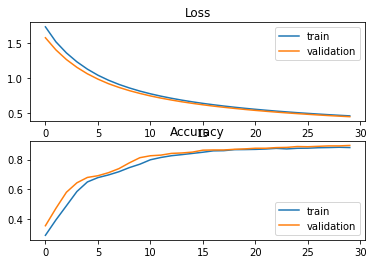

In [323]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(results.history['loss'], label='train')
plt.plot(results.history['val_loss'], label='validation')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(results.history['accuracy'], label='train')
plt.plot(results.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

### 7. Représentez la matrice de confusion et évaluez les performances en utilisant classification_report.

In [324]:
matrix = confusion_matrix(ytest, ypred)
print(matrix)

[[90  2  0  0  0  0  7]
 [ 3 77  1  0 10  0  8]
 [ 5  1 81  0  0  0 12]
 [ 1  0  0 97  0  0  1]
 [ 0  0  0  0 99  0  0]
 [ 0  0  0  0  0 99  0]
 [ 4  0 18  0  0  0 77]]


In [325]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

   brickface       0.87      0.91      0.89        99
      cement       0.96      0.78      0.86        99
     foliage       0.81      0.82      0.81        99
       grass       1.00      0.98      0.99        99
        path       0.91      1.00      0.95        99
         sky       1.00      1.00      1.00        99
      window       0.73      0.78      0.75        99

    accuracy                           0.89       693
   macro avg       0.90      0.89      0.89       693
weighted avg       0.90      0.89      0.89       693



### 8. Testez d’autres fonction d’activation. Comparez les résultats.

In [330]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [336]:
def create_model(optimizer='adam',activation='softmax'):
    # create model
    model = Sequential()
    model.add(layers.Dense( units=y_train.shape[1] , activation=activation) )
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [338]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=10, verbose=0)
# define the grid search parameters
#on va tester les fonctions d'activation et les optimizateurs
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
activation = ['softmax', 'relu','sigmoid','softplus','softsign','tanh','selu','elu']
param_grid = dict(optimizer=optimizer,activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-338-2baf3e35537a>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=10, verbose=0)


Best: 0.898578 using {'activation': 'sigmoid', 'optimizer': 'RMSprop'}
0.878169 (0.004628) with: {'activation': 'softmax', 'optimizer': 'SGD'}
0.896104 (0.011831) with: {'activation': 'softmax', 'optimizer': 'RMSprop'}
0.286951 (0.041550) with: {'activation': 'softmax', 'optimizer': 'Adagrad'}
0.096475 (0.068033) with: {'activation': 'softmax', 'optimizer': 'Adadelta'}
0.890538 (0.009214) with: {'activation': 'softmax', 'optimizer': 'Adam'}
0.842301 (0.014919) with: {'activation': 'softmax', 'optimizer': 'Adamax'}
0.893630 (0.005735) with: {'activation': 'softmax', 'optimizer': 'Nadam'}
0.142857 (0.010604) with: {'activation': 'relu', 'optimizer': 'SGD'}
0.142857 (0.010604) with: {'activation': 'relu', 'optimizer': 'RMSprop'}
0.255411 (0.148688) with: {'activation': 'relu', 'optimizer': 'Adagrad'}
0.157699 (0.028782) with: {'activation': 'relu', 'optimizer': 'Adadelta'}
0.142857 (0.010604) with: {'activation': 'relu', 'optimizer': 'Adam'}
0.174397 (0.051837) with: {'activation': 'relu'

### 9. Développez un perceptron multicouche (2 couches cachées à 30 neurones, fonctions d’activation ReLu).

In [307]:
PMC = Sequential( )
# Ajout de la premiere couche "entree 􀀀> cachee"
# 30 neurones dans la premiere couche cachee
# ZTrain . shape[1] : dimension du vecteur de caracteristiques en entree
PMC.add(layers.Dense( units=30,input_dim=X_train.shape[1] , activation='relu' ) )
# Ajout de la seconde couche "cachee 􀀀> cachee"
# 30 neurones dans la deuxieme couche cachee
PMC.add(layers.Dense(30, activation='relu' ) )
# Ajout de la troisieme couche "cachee 􀀀> sor t ie "
# mYTrain. shape[1] neurones dans la couche cachee =
# nb de modalites de la variable cible
PMC.add(layers.Dense( units=y_train.shape[1] , activation='softmax' ) )
PMC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print('Number of layers :',len(PMC.layers)) 
print('Training')
# fit model
results = PMC.fit(X_train, y_train,validation_data=(X_test, y_test),epochs=30)

Number of layers : 3
Training
Epoch 1/30
51/51 [==============================] - 1s 4ms/step - loss: 1.7732 - accuracy: 0.3686 - val_loss: 1.4054 - val_accuracy: 0.6421
Epoch 2/30
51/51 [==============================] - 0s 1ms/step - loss: 1.1688 - accuracy: 0.7062 - val_loss: 0.9178 - val_accuracy: 0.8124
Epoch 3/30
51/51 [==============================] - 0s 1ms/step - loss: 0.7681 - accuracy: 0.8200 - val_loss: 0.6213 - val_accuracy: 0.8600
Epoch 4/30
51/51 [==============================] - 0s 1ms/step - loss: 0.5497 - accuracy: 0.8571 - val_loss: 0.4725 - val_accuracy: 0.8831
Epoch 5/30
51/51 [==============================] - 0s 1ms/step - loss: 0.4252 - accuracy: 0.8887 - val_loss: 0.4022 - val_accuracy: 0.8932
Epoch 6/30
51/51 [==============================] - 0s 1ms/step - loss: 0.3580 - accuracy: 0.9011 - val_loss: 0.3289 - val_accuracy: 0.9105
Epoch 7/30
51/51 [==============================] - 0s 1ms/step - loss: 0.3029 - accuracy: 0.9091 - val_loss: 0.2874 - val_accurac

In [308]:
PMC.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 30)                600       
                                                                 
 dense_19 (Dense)            (None, 30)                930       
                                                                 
 dense_20 (Dense)            (None, 7)                 217       
                                                                 
Total params: 1,747
Trainable params: 1,747
Non-trainable params: 0
_________________________________________________________________


In [309]:
predict_x=PMC.predict(X_test) 
#reverse the prediction to an integer via argmax
classes_x=np.argmax(PMC.predict(X_test), axis=-1)

In [310]:
class_vector =classes_x
#print(class_vector)
 
# Applying the function on input class vector
from tensorflow.keras.utils import to_categorical
y_pred = to_categorical(class_vector, num_classes = 7, dtype ="int32")

In [311]:
# transforming back to one column classe

In [312]:
ypred=enc.inverse_transform(y_pred)
ytest=enc.inverse_transform(y_test)

### 10. Représentez la matrice de confusion et évaluez les performances en utilisant classification_report.

In [313]:
matrix = confusion_matrix(ytest, ypred)
print(matrix)
print(classification_report(ytest, ypred))

[[99  0  0  0  0  0  0]
 [ 1 91  0  0  1  0  6]
 [ 0  2 91  0  0  0  6]
 [ 0  0  1 97  1  0  0]
 [ 0  0  0  0 99  0  0]
 [ 0  0  0  0  0 99  0]
 [ 0  2  8  0  0  0 89]]
              precision    recall  f1-score   support

   brickface       0.99      1.00      0.99        99
      cement       0.96      0.92      0.94        99
     foliage       0.91      0.92      0.91        99
       grass       1.00      0.98      0.99        99
        path       0.98      1.00      0.99        99
         sky       1.00      1.00      1.00        99
      window       0.88      0.90      0.89        99

    accuracy                           0.96       693
   macro avg       0.96      0.96      0.96       693
weighted avg       0.96      0.96      0.96       693



### Choosing the best 2-layer model

In [339]:
def create_model(optimizer='adam',activation='relu'):
    # create model
    model = Sequential()
    model.add(layers.Dense( units=30,input_dim=X_train.shape[1] , activation=activation ) )
    model.add(layers.Dense(30, activation=activation ) )
    model.add(layers.Dense( units=y_train.shape[1] , activation='softmax') )
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [340]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=10, verbose=0)
# define the grid search parameters
#on va tester les fonctions d'activation et les optimizateurs
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
activation = ['softmax', 'relu','sigmoid','softplus','softsign','tanh','selu','elu']
param_grid = dict(optimizer=optimizer,activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-340-2baf3e35537a>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model, epochs=30, batch_size=10, verbose=0)


Best: 0.965368 using {'activation': 'tanh', 'optimizer': 'Adam'}
0.122449 (0.008016) with: {'activation': 'softmax', 'optimizer': 'SGD'}
0.790353 (0.042090) with: {'activation': 'softmax', 'optimizer': 'RMSprop'}
0.144712 (0.012943) with: {'activation': 'softmax', 'optimizer': 'Adagrad'}
0.137291 (0.018615) with: {'activation': 'softmax', 'optimizer': 'Adadelta'}
0.765615 (0.067649) with: {'activation': 'softmax', 'optimizer': 'Adam'}
0.611626 (0.052788) with: {'activation': 'softmax', 'optimizer': 'Adamax'}
0.733457 (0.081313) with: {'activation': 'softmax', 'optimizer': 'Nadam'}
0.925170 (0.012338) with: {'activation': 'relu', 'optimizer': 'SGD'}
0.957947 (0.002314) with: {'activation': 'relu', 'optimizer': 'RMSprop'}
0.642548 (0.054562) with: {'activation': 'relu', 'optimizer': 'Adagrad'}
0.163265 (0.071036) with: {'activation': 'relu', 'optimizer': 'Adadelta'}
0.959802 (0.004870) with: {'activation': 'relu', 'optimizer': 'Adam'}
0.936302 (0.012704) with: {'activation': 'relu', 'opt